In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class lgrku:

    def __init__(self, fit_intercept=True):
        self.coef_ = None
        self.intercept_ = None
        self._fit_intercept = fit_intercept

    def __repr__(self):
        return "I am a Linear Regression model!"

    def fit(self, X, y):
        """
        Fit model coefficients.

        Arguments:
        X: 1D or 2D numpy array
        y: 1D numpy array
        """

        # check if X is 1D or 2D array
        if len(X.shape) == 1:
            X = X.reshape(-1,1)

        # add bias if fit_intercept is True
        if self._fit_intercept:
            X_biased = np.c_[np.ones(X.shape[0]), X]
        else:
            X_biased = X

        # closed form solution
        xTx = np.dot(X_biased.T, X_biased)
        inverse_xTx = np.linalg.inv(xTx)
        xTy = np.dot(X_biased.T, y)
        coef = np.dot(inverse_xTx, xTy)

        # set attributes
        if self._fit_intercept:
            self.intercept_ = coef[0]
            self.coef_ = coef[1:]
        else:
            self.intercept_ = 0
            self.coef_ = coef

        # Predicted/fitted y
        self.fitted_ = np.dot(X,mlr.coef_) + mlr.intercept_

    def plot_fitted(self,reference_line=False):
        """
        Plots fitted values against the true output values from the data

        Arguments:
        reference_line: A Boolean switch to draw a 45-degree reference line on the plot
        """
        plt.title("True vs. fitted values",fontsize=14)
        plt.scatter(y,self.fitted_,s=100,alpha=0.75,color='red',edgecolor='k')
        if reference_line:
            plt.plot(y,y,c='k',linestyle='dotted')
        plt.xlabel("True values")
        plt.ylabel("Fitted values")
        plt.grid(True)
        plt.show()

    def predict(self, X):
        """Output model prediction.

        Arguments:
        X: 1D or 2D numpy array
        """
        # check if X is 1D or 2D array
        if len(X.shape) == 1:
            X = X.reshape(-1,1)
        self.predicted_ = self.intercept_ + np.dot(X, self.coef_)
        return self.predicted_

In [3]:
mlr = lgrku()
mlr._fit_intercept
mlr.coef_==None
mlr.intercept_ == None

True

In [4]:
print(mlr)

I am a Linear Regression model!


In [5]:
X = 5*np.random.random(size=(20,2))
y = 3.5*X.T[0]-1.2*X.T[1]+2*np.random.randn(20)

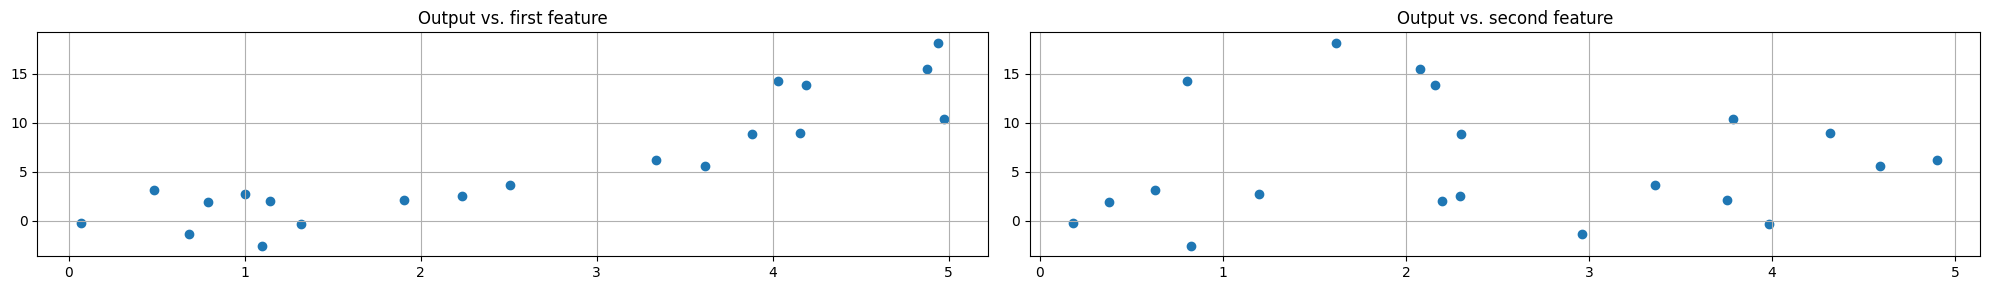

In [6]:
fig, ax = plt.subplots(1,2,figsize=(20,3))

ax[0].scatter(X.T[0],y)
ax[0].set_title("Output vs. first feature")
ax[0].grid(True)
ax[1].scatter(X.T[1],y)
ax[1].set_title("Output vs. second feature")
ax[1].grid(True)
fig.tight_layout()
plt.show()

In [7]:
print("We have not fitted the data yet. There is no regression coefficients")
print("Regression coefficients:", mlr.coef_)

We have not fitted the data yet. There is no regression coefficients
Regression coefficients: None


In [8]:
mlr.fit(X,y)

In [9]:
print("We have fitted the data. We can print the regression coefficients now")
print("Regression coefficients:", mlr.coef_)

We have fitted the data. We can print the regression coefficients now
Regression coefficients: [ 3.71371009 -1.47938103]


In [10]:
print("The intercept term is given by: ", mlr.intercept_)

The intercept term is given by:  -0.17082044092960913


In [11]:
coef_ = mlr.coef_
y_pred = np.dot(X,coef_)+mlr.intercept_

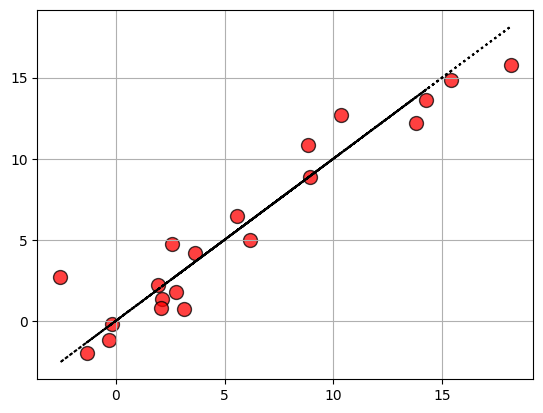

In [12]:
plt.scatter(y,y_pred,s=100,alpha=0.75,color='red',edgecolor='k')
plt.plot(y,y,c='k',linestyle='dotted')
plt.grid(True)
plt.show()

In [13]:
# A fresh instance
mlr = lgrku()
# Fitting with the data
mlr.fit(X,y)

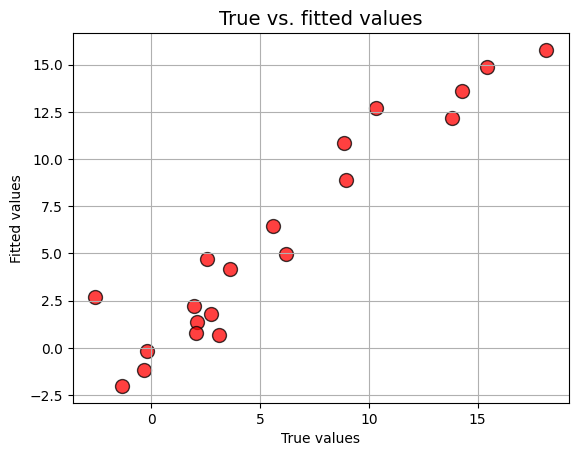

In [14]:
# Call the 'plot_fitted' method
mlr.plot_fitted()

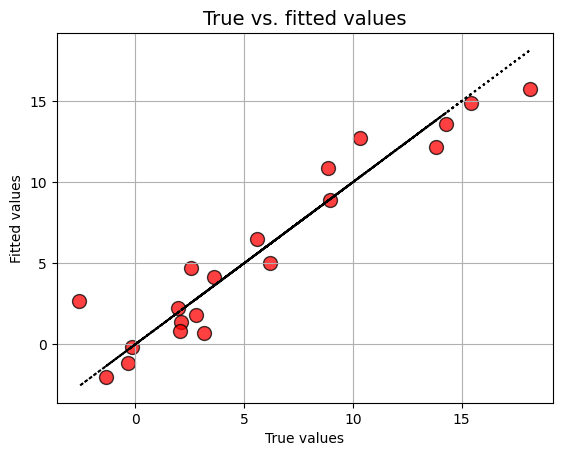

In [15]:
# We can pass on a switch 'reference_line' to draw a 45-degree reference line on the plot
mlr.plot_fitted(reference_line=True)

In [16]:
num_new_samples = 10
X_new = 10*np.random.random(size=(num_new_samples,2))
y_new = 3.5*X_new.T[0]-1.2*X_new.T[1]+2*np.random.randn(num_new_samples)

In [17]:
mlr = lgrku()

In [18]:
mlr.fit(X,y)

In [20]:
y_pred=mlr.predict(X_new)

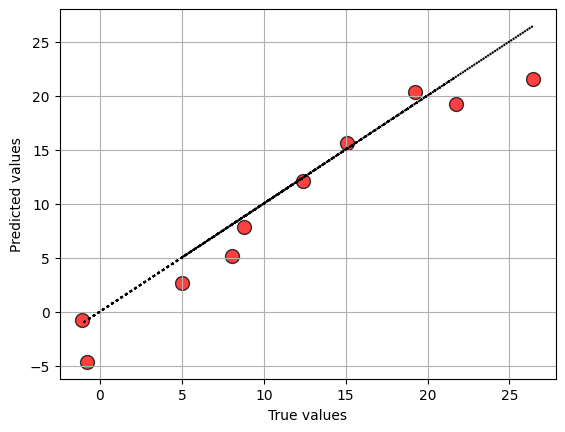

In [21]:
plt.scatter(y_new,y_pred,s=100,alpha=0.75,color='red',edgecolor='k')
plt.plot(y_new,y_new,c='k',linestyle='dotted')
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.grid(True)
plt.show()